In [1]:
import pennylane as qml

dev = qml.device("default.qubit", 1)

@qml.qnode(dev)
def simple_x_gate():
    qml.PauliX(0)
    return qml.expval(qml.PauliZ(0))


print(simple_x_gate())

print(simple_x_gate.draw())

-1.0
 0: ──X──┤ ⟨Z⟩ 



In [2]:
@qml.qnode(dev)
def vqc(phi):
    qml.RX(phi, wires=[0])
    return qml.expval(qml.PauliZ(0))

In [3]:
print(f"Try 1.0: {vqc(0)}")
print(f"Try 2.0: {vqc(2)}")
print(f"Try 3.0: {vqc(3)}")
print(f"Try 3.14159265359: {vqc(3.14159265359)}")

Try 1.0: 1.0
Try 2.0: -0.4161468365471423
Try 3.0: -0.9899924966004454
Try 3.14159265359: -1.0


In [4]:
@qml.qnode(dev)
def angle_vqc(a, b):
    qml.RY(a, wires=[0])
    qml.RZ(b, wires=[0])

    return qml.expval(qml.PauliZ(0))

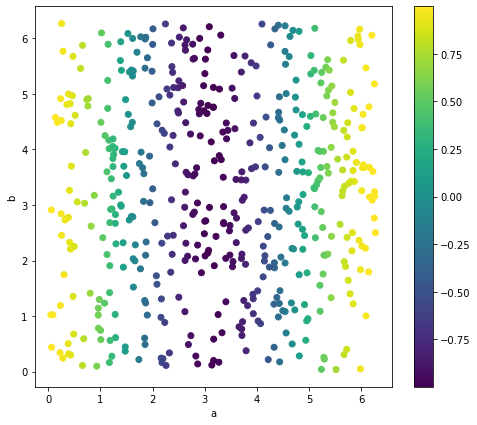

In [5]:
import numpy as np
import matplotlib.pyplot as plt

aa = np.random.uniform(0, 2 * np.pi, size=500)
bb = np.random.uniform(0, 2 * np.pi, size=500)

res = [angle_vqc(a, b) for a, b in zip(aa, bb)]

f = plt.figure(figsize=(8, 7))
clb = plt.scatter(aa, bb, c=res)
plt.xlabel("a")
plt.ylabel("b")
plt.colorbar(clb)

f.show()

In [6]:
@qml.qnode(dev)
def angle_vqc_pl(a, b):
    qml.templates.embeddings.AngleEmbedding([a], wires=[0], rotation="Y")
    qml.templates.embeddings.AngleEmbedding([b], wires=[0], rotation="Z")
    return qml.expval(qml.PauliZ(0))

In [7]:
res_pl = [angle_vqc_pl(a, b) for a, b in zip(aa, bb)]
print(np.allclose(res, res_pl))

True


In [8]:
dev2 = qml.device("default.qubit", 2)

@qml.qnode(dev2)
def cnot_vqc(a, b):
    qml.RY(a, wires=0)
    qml.RY(b, wires=1)
    qml.RZ(a, wires=0)
    qml.RZ(b, wires=1)
    qml.CZ(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

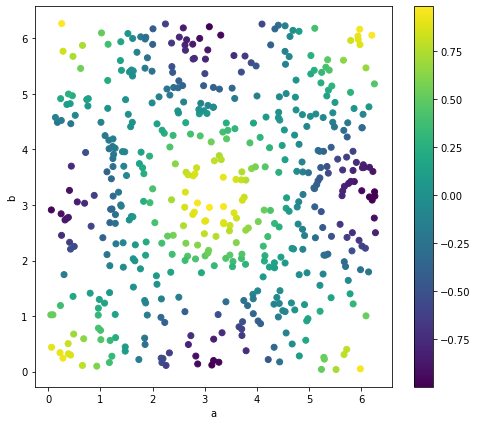

In [9]:
res = [cnot_vqc(a, b) for a, b in zip(aa, bb)]

f = plt.figure(figsize=(8, 7))
clb = plt.scatter(aa, bb, c=res)
plt.xlabel("a")
plt.ylabel("b")
plt.colorbar(clb)

plt.show()